In [2]:
print(df_time_100)

     Total Time Signature Verification Time      HMAC Comparison Time  \
0      0.159132     [0.0032749176025390625]  [0.00035262107849121094]   
1      0.151093     [0.0029582977294921875]   [0.0011162757873535156]   
2      0.149269     [0.0021147727966308594]  [0.00038552284240722656]   
3      0.153308     [0.0018537044525146484]   [0.0003681182861328125]   
4      0.160277     [0.0029709339141845703]  [0.00036215782165527344]   
..          ...                         ...                       ...   
325    0.147958     [0.0018591880798339844]   [0.0003733634948730469]   
326    0.148367     [0.0023224353790283203]   [0.0004138946533203125]   
327    0.151354      [0.001983165740966797]   [0.0003447532653808594]   
328    0.140635     [0.0017616748809814453]   [0.0003597736358642578]   
329    0.146227     [0.0018610954284667969]   [0.0003304481506347656]   

                Signing Time   AES-GCM Encryption Time  
0    [0.0013723373413085938]  [0.00013136863708496094]  
1    [0.0

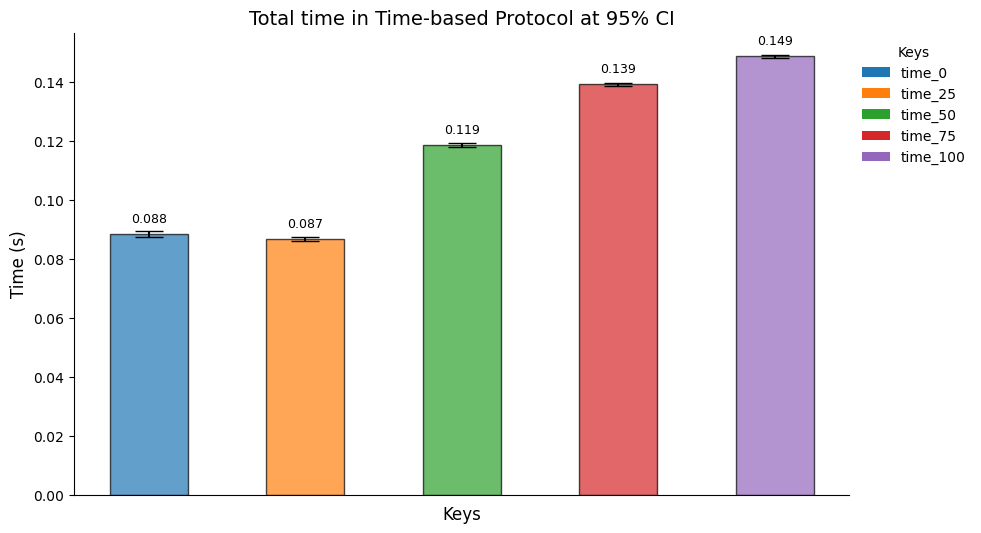

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

df_time_0 = pd.read_csv('./data/Time/receiver_time_0_protocol.csv')
df_time_25 = pd.read_csv('./data/Time/receiver_time_25_protocol.csv')
df_time_50 = pd.read_csv('./data/Time/receiver_time_50_protocol.csv')
df_time_75 = pd.read_csv('./data/Time/receiver_time_75_protocol.csv')
df_time_100 = pd.read_csv('./data/Time/receiver_time_100_protocol.csv')

# Choose a column to compare
column_to_compare = 'Total Time'
scientific_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
# Extract data for the chosen column from the concatenated DataFrames
data_columns_concatenated = {
    'time_0': df_time_0[column_to_compare],
    'time_25': df_time_25[column_to_compare],
    'time_50': df_time_50[column_to_compare],
    'time_75': df_time_75[column_to_compare],
    'time_100': df_time_100[column_to_compare],
    }

# Calculate mean and standard deviation
means = [data_column.mean() for data_column in data_columns_concatenated.values()]
std_devs = [data_column.std() for data_column in data_columns_concatenated.values()]
n_values = [len(data_column) for data_column in data_columns_concatenated.values()]

# Calculate 95% confidence interval
ci = [1.96 * std_dev / np.sqrt(n) for std_dev, n in zip(std_devs, n_values)]

# Prepare data for plotting
keys = list(data_columns_concatenated.keys())
x_pos = np.arange(len(keys))

# Plot bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, means, yerr=ci, align='center', alpha=0.7, ecolor='black', capsize=10, width=0.5, color=scientific_colors, edgecolor='black')

# Customize legend
legend_elements = [Patch(facecolor=color, label=key) for key, color in zip(keys, scientific_colors)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title='Keys', frameon=False)

# Remove x-axis labels
plt.xticks([])

# Add data labels on top of the bars
for i, mean in enumerate(means):
    plt.text(x_pos[i], mean + 0.02 * max(means), f'{mean:.3f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Keys', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.title(f'Total time in Time-based Protocol at 95% CI', fontsize=14)

# Remove the top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [3]:
print(means)
print(ci)

[0.08831597127129552, 0.08680331133649437, 0.11851766371702928, 0.13913025539299656, 0.14862703337813868]
[0.00103178534076996, 0.0007146442156058934, 0.0007033725813417361, 0.0006641324364080423, 0.0006412396712123985]


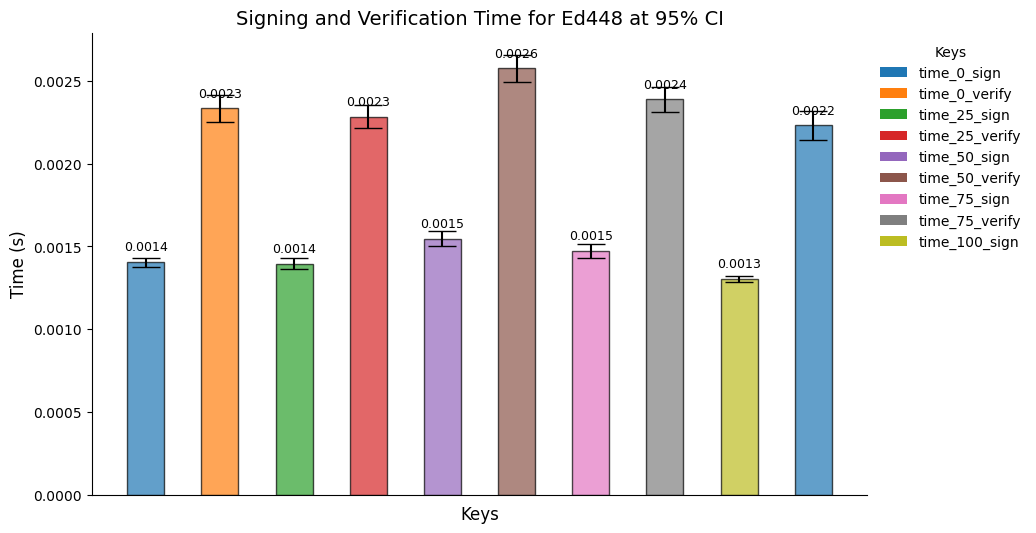

In [6]:
# Choose a column to compare

# Extract data for the chosen column from the concatenated DataFrames
data_columns_concatenated = {
    'time_0_sign': df_time_0['Signing Time'].apply(lambda x: eval(x)[0]),
    'time_0_verify': df_time_0['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    'time_25_sign': df_time_25['Signing Time'].apply(lambda x: eval(x)[0]),
    'time_25_verify': df_time_25['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    'time_50_sign': df_time_50['Signing Time'].apply(lambda x: eval(x)[0]),
    'time_50_verify': df_time_50['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    'time_75_sign': df_time_75['Signing Time'].apply(lambda x: eval(x)[0]),
    'time_75_verify': df_time_75['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    'time_100_sign': df_time_100['Signing Time'].apply(lambda x: eval(x)[0]),
    'time_100_verify': df_time_100['Signature Verification Time'].apply(lambda x: eval(x)[0]),
    }


# Calculate mean and standard deviation
means = [data_column.mean() for data_column in data_columns_concatenated.values()]
std_devs = [data_column.std() for data_column in data_columns_concatenated.values()]

n_values = [len(data_column) for data_column in data_columns_concatenated.values()]

# Calculate 95% confidence interval
ci = [1.96 * std_dev / np.sqrt(n) for std_dev, n in zip(std_devs, n_values)]

# Prepare data for plotting
keys = list(data_columns_concatenated.keys())
x_pos = np.arange(len(keys))

# Plot bar graph with mean and standard deviation
plt.figure(figsize=(10, 6))
bars = plt.bar(x_pos, means, yerr=ci, align='center', alpha=0.7, ecolor='black', capsize=10, width=0.5, color=scientific_colors, edgecolor='black')

# Customize legend
legend_elements = [Patch(facecolor=color, label=key) for key, color in zip(keys, scientific_colors)]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1), title='Keys', frameon=False)

# Remove x-axis labels
plt.xticks([])

# Add data labels on top of the bars
for i, mean in enumerate(means):
    plt.text(x_pos[i], mean + 0.02 * max(means), f'{mean:.4f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Keys', fontsize=12)
plt.ylabel('Time (s)', fontsize=12)
plt.title(f'Signing and Verification Time for Ed448 at 95% CI', fontsize=14)

# Remove the top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

In [7]:
print(means)
print(ci)

[0.001404447243743174, 0.002333404515211585, 0.001395500016833594, 0.002282845472286125, 0.0015474823721723047, 0.0025753132871133167, 0.001471973140008042, 0.002387917203070346, 0.0013025876247521602, 0.0022310141361120976]
[2.703516409468651e-05, 7.91152659916653e-05, 3.2305049077397186e-05, 6.948329334665527e-05, 4.3522165328710704e-05, 8.380193634254397e-05, 4.244955336942308e-05, 7.782724206360008e-05, 2.0281715702153298e-05, 8.85561821107104e-05]
